# Инициализация

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from kerastuner.tuners import BayesianOptimization
from tensorflow import keras
from keras_tuner import Objective
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Pave_\AppData\Local\Temp\ipykernel_7636\2570398892.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import BayesianOptimization


In [2]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина комментария
max_comment_len = 50
#Число классов
num_classes = 6

# Загрузка тренировочных данных

In [3]:
train = pd.read_csv('toxicCommentsDataSet/toxicCommentsTrain.csv')

In [4]:
#Получение комментариев
comments = train['comment_text']

In [5]:
y_train = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# Токенизация

In [6]:
tokenizer = Tokenizer(num_words=num_words)

In [7]:
#Обучение токенайзера
tokenizer.fit_on_texts(comments)

In [8]:
train_sequences = tokenizer.texts_to_sequences(comments)

In [9]:
x_train = pad_sequences(train_sequences, maxlen=max_comment_len)

# Загрузка тестовых данных

In [10]:
test_comments = pd.read_csv('toxicCommentsDataSet/toxicCommentsTest.csv')

In [11]:
test_labels = pd.read_csv('toxicCommentsDataSet/toxicCommentsTestLabels.csv')

In [12]:
test_full = pd.merge(test_comments, test_labels, on='id')

In [13]:
test = test_full[test_full['toxic']!=-1]

# Токенизация

In [14]:
test_sequences = tokenizer.texts_to_sequences(test['comment_text'])

In [15]:
y_test = test[['toxic',	'severe_toxic',	'obscene', 'threat',	'insult',	'identity_hate']]

In [16]:
x_test = pad_sequences(test_sequences, maxlen=max_comment_len)

# Проверка лучшей модели

In [17]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=4, input_length=max_comment_len,
                    embeddings_regularizer=keras.regularizers.l2(0.0001)))
model.add(Dense(units=1024, activation='selu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(Dense(units=1024, activation='selu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[keras.metrics.AUC(name="auc"), 'accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 4)             40000     
                                                                 
 dense (Dense)               (None, 50, 1024)          5120      
                                                                 
 dense_1 (Dense)             (None, 50, 1024)          1049600   
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 6)                 307206    
                                                                 
Total params: 1,401,926
Trainable params: 1,401,926
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_model = model.fit(x_train,
                          y_train,
                          epochs=5,
                          batch_size=1024,
                          validation_split=0.2)

Epoch 1/5
125/125 [==============================] - 511s 4s/step - loss: 0.1727 - auc: 0.8302 - accuracy: 0.9821 - val_loss: 0.0859 - val_auc: 0.9488 - val_accuracy: 0.9934
Epoch 2/5
125/125 [==============================] - 517s 4s/step - loss: 0.0821 - auc: 0.9466 - accuracy: 0.9402 - val_loss: 0.0724 - val_auc: 0.9633 - val_accuracy: 0.9161
Epoch 3/5
125/125 [==============================] - 529s 4s/step - loss: 0.0749 - auc: 0.9558 - accuracy: 0.8451 - val_loss: 0.0744 - val_auc: 0.9643 - val_accuracy: 0.8141
Epoch 4/5
125/125 [==============================] - 500s 4s/step - loss: 0.0720 - auc: 0.9600 - accuracy: 0.7301 - val_loss: 0.0733 - val_auc: 0.9647 - val_accuracy: 0.8654
Epoch 5/5
125/125 [==============================] - 496s 4s/step - loss: 0.0714 - auc: 0.9612 - accuracy: 0.7238 - val_loss: 0.0722 - val_auc: 0.9544 - val_accuracy: 0.2407


In [23]:
model.evaluate(x_test, y_test)

2000/2000 [==============================] - 162s 81ms/step - loss: 0.0876 - auc: 0.9503 - accuracy: 0.3223


[0.08758601546287537, 0.9503415822982788, 0.3222982883453369]

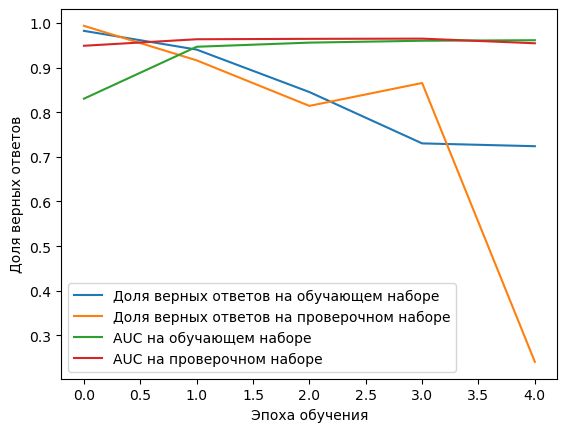

In [21]:
plt.plot(history_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.plot(history_model.history['auc'],
         label='AUC на обучающем наборе')
plt.plot(history_model.history['val_auc'],
         label='AUC на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

2000/2000 [==============================] - 161s 80ms/step - loss: 0.0876 - auc: 0.9503 - accuracy: 0.3223


[0.08758601546287537, 0.9503415822982788, 0.3222982883453369]